In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/harshit2490/Fire-Detection-using-ML-Algorithms/main/RawData(csv)/forestfires.csv')
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [ ]:
  #  1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
  #  2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
  #  3. month - month of the year: "jan" to "dec" 
  #  4. day - day of the week: "mon" to "sun"
  #  5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
  #  6. DMC - DMC index from the FWI system: 1.1 to 291.3 
  #  7. DC - DC index from the FWI system: 7.9 to 860.6 
  #  8. ISI - ISI index from the FWI system: 0.0 to 56.10
  #  9. temp - temperature in Celsius degrees: 2.2 to 33.30
  #  10. RH - relative humidity in %: 15.0 to 100
  #  11. wind - wind speed in km/h: 0.40 to 9.40 
  #  12. rain - outside rain in mm/m2 : 0.0 to 6.4 
  #  13. area - the burned area of the forest (in ha): 0.00 to 1090.84 
  #  (this output variable is very skewed towards 0.0, thus it may make
  #   sense to model with the logarithm transform). 

In [ ]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
df.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [ ]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [ ]:
df.shape

(517, 13)

In [ ]:
df.size

6721

In [ ]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [ ]:
df.corr()['area']

X       0.063385
Y       0.044873
FFMC    0.040122
DMC     0.072994
DC      0.049383
ISI     0.008258
temp    0.097844
RH     -0.075519
wind    0.012317
rain   -0.007366
area    1.000000
Name: area, dtype: float64

In [ ]:
#renaming the area attribute to output for clear understanding
df = df.rename(columns={'X': 'A','Y':'B'})
df

,A,B,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [ ]:
df.columns

Index(['A', 'B', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [ ]:
# y=df['area']
y=df.iloc[:,12]
y

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area, Length: 517, dtype: float64

In [ ]:
y.ndim

1

In [ ]:
y=df.iloc[:,12].values 
# y=df['area'].values
y

array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.000

In [ ]:
x=df.iloc[:,0:12]
x

,A,B,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


In [ ]:
x.ndim

2

In [ ]:
x=df.iloc[:,0:12].values
x

array([[ 7. ,  5. ,  3. , ..., 51. ,  6.7,  0. ],
       [ 7. ,  4. , 10. , ..., 33. ,  0.9,  0. ],
       [ 7. ,  4. , 10. , ..., 33. ,  1.3,  0. ],
       ...,
       [ 7. ,  4. ,  8. , ..., 70. ,  6.7,  0. ],
       [ 1. ,  4. ,  8. , ..., 42. ,  4. ,  0. ],
       [ 6. ,  3. , 11. , ..., 31. ,  4.5,  0. ]])

In [ ]:
df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [ ]:
df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)

In [ ]:
df.head(15) 

,A,B,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,8,7,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,8,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,8,1,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,9,2,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,9,6,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [ ]:
#import the algorithm 
from sklearn.linear_model import LinearRegression

In [ ]:
#call the regressor algorithm
model = LinearRegression()

In [ ]:
model.fit(x,y)

LinearRegression()

In [ ]:
x.size

6204

In [ ]:
y.size

517

Text(0, 0.5, 'area')

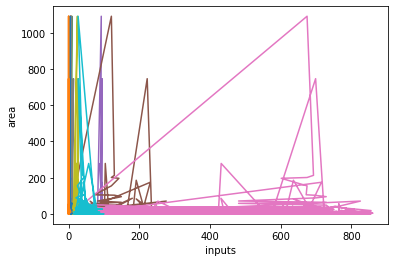

In [185]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.xlabel('inputs')
plt.ylabel('area')

<Figure size 720x1440 with 0 Axes>

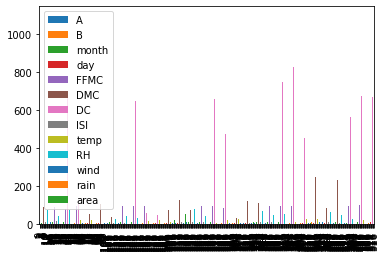

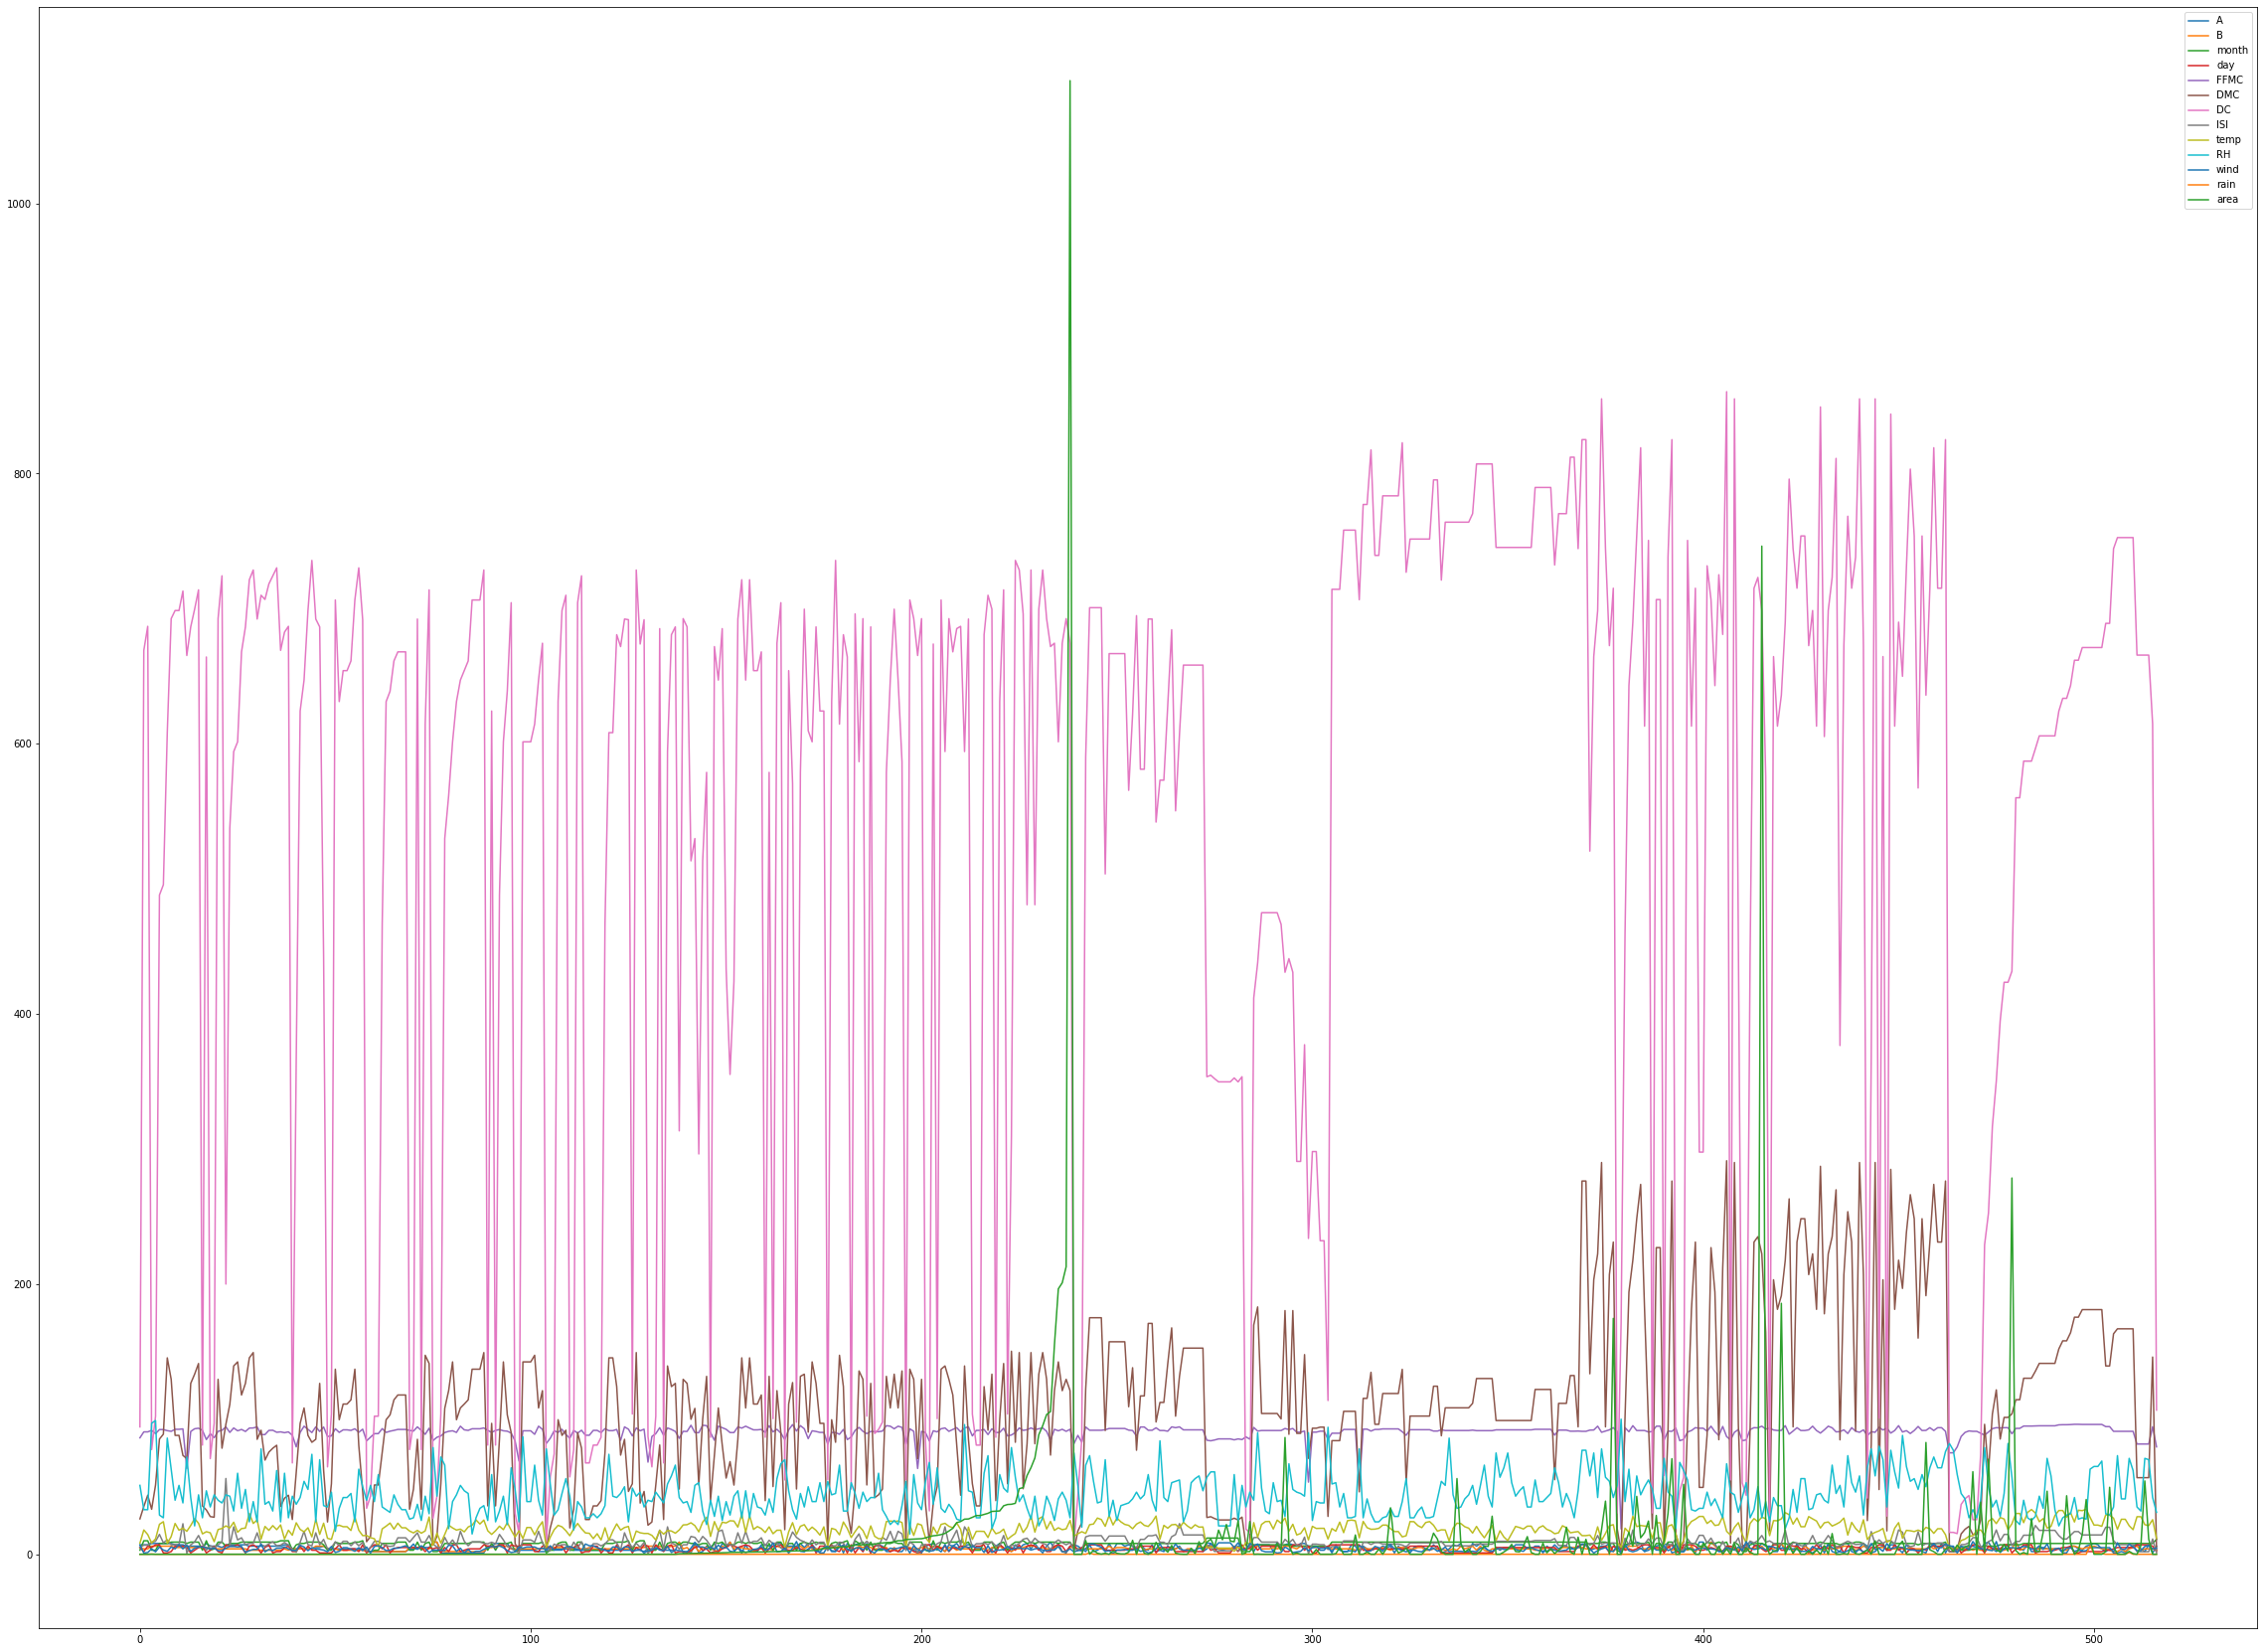

In [187]:
plt.figure(figsize=(10,20))
df.plot(kind='bar')
df.plot(figsize=(40,30))

In [188]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=200,test_size=0.35)


In [189]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(336, 12)
(181, 12)
(336,)
(181,)


In [190]:
from sklearn.linear_model import LinearRegression #import linear regression algorithm

In [191]:
model = LinearRegression() #call the algorithm

In [194]:
model.fit(x_train,y_train)

LinearRegression()

In [195]:
y_pred=model.predict(x_test)#predicted output
y_pred

array([  9.78970798,  13.41553107,  -4.20807481,  39.52233026,
        13.22121431,  56.41122482,  -2.08076678,  33.51753334,
         6.39704702,  13.89080306,   8.21474919,  -1.19153684,
        20.63309583,  -9.88464631,  20.94321344,  29.62149254,
        24.92503622,  38.99885364, -11.83124964,  22.97061338,
        15.04106549,  25.76969029,  16.03111099,  20.31747195,
         6.76092145,  19.05237434,  27.54447111,   0.29704752,
        17.09985495,  -6.40847405,  20.49904395,  13.64639972,
        20.60212082,  15.55037975,  10.57735959,   8.58621547,
         8.93371149,   3.04207612,  26.1047872 ,  -0.94396929,
         7.83115724,  40.3937112 ,  12.98450748,  11.17503532,
        38.33088942,  23.94828063,   9.30193923,  24.47347363,
         4.35486032,  26.40336965,  22.71282266,  22.75004907,
       -18.88802827,  10.47148364,  15.58152515,  26.41498561,
        31.37981635,  23.79730958,   1.46315857,  29.93017879,
         0.75782738,  32.81798038,   0.05693321,  25.68

In [196]:
y_test

array([3.6400e+00, 6.8000e-01, 0.0000e+00, 9.0000e-01, 0.0000e+00,
       6.3000e+00, 0.0000e+00, 1.6300e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.6300e+00, 0.0000e+00, 5.3900e+00, 5.1800e+00,
       0.0000e+00, 0.0000e+00, 8.1600e+00, 3.0320e+01, 1.2900e+00,
       9.9600e+00, 3.5200e+00, 0.0000e+00, 1.9500e+00, 1.7000e-01,
       0.0000e+00, 4.8550e+01, 0.0000e+00, 2.0100e+00, 0.0000e+00,
       0.0000e+00, 6.5400e+00, 3.3300e+00, 0.0000e+00, 0.0000e+00,
       6.6100e+00, 0.0000e+00, 8.1200e+00, 0.0000e+00, 3.3000e+00,
       0.0000e+00, 5.4000e-01, 4.9500e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 4.9370e+01, 1.5200e+00, 0.0000e+00, 2.5500e+00,
       2.1000e-01, 7.1300e+01, 0.0000e+00, 5.5000e-01, 3.8480e+01,
       2.3500e+00, 3.0500e+00, 0.0000e+00, 0.0000e+00, 2.4000e-01,
       5.2000e-01, 0.0000e+00, 0.0000e+00, 1.1160e+01, 2.8660e+01,
       7.4800e+00, 3.9300e+00, 0.0000e+00, 0.0000e+00, 1.9648e+02,
       1.7200e+01, 7.6000e-01, 1.3800e+00, 0.0000e+00, 0.0000e